In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

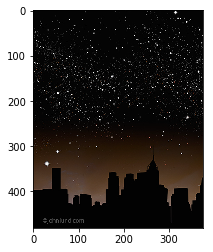

In [2]:
image = cv2.imread('Urban-Night-Day.jpg')
rows,cols,dpt = image.shape

A = image[:,0:int(cols/2)]
B = image[:,int(cols/2):cols-1]

plt.imshow(A)


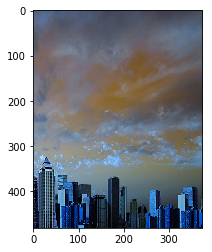

In [3]:
plt.imshow(B)

In [4]:
# generate Gaussian pyramid for A
G = A.copy()
gpA = [G]
for i in range(6):
    G = cv2.pyrDown(G)
    gpA.append(G)

In [5]:
# generate Gaussian pyramid for B
G = B.copy()
gpB = [G]
for i in range(6):
    G = cv2.pyrDown(G)
    gpB.append(G)

In [15]:
# generate Laplacian Pyramid for A
lpA = [gpA[5]]
for i in range(5,0,-1):
    GE = cv2.pyrUp(gpA[i])
    print(gpA[i-1].shape)
    print(GE.shape)
    if(GE.shape[0] != gpA[i-1].shape[0]):
        GE = GE[0 : GE.shape[0] - 1]
    if(GE.shape[1] != gpA[i-1].shape[1]):
        GE = GE[:,0 : GE.shape[1] - 1]
    L = cv2.subtract(gpA[i-1],GE)
    lpA.append(L)

# generate Laplacian Pyramid for B
lpB = [gpB[5]]
for i in range(5,0,-1):
    GE = cv2.pyrUp(gpB[i])
    print(gpB[i-1].shape)
    print(GE.shape)
    if(GE.shape[0] != gpB[i-1].shape[0]):
        GE = GE[0 : GE.shape[0] - 1]
    if(GE.shape[1] != gpB[i-1].shape[1]):
        GE = GE[:,0 : GE.shape[1] - 1]
    L = cv2.subtract(gpB[i-1],GE)
    lpB.append(L)

(31, 24, 3)
(32, 24, 3)
(61, 47, 3)
(62, 48, 3)
(121, 94, 3)
(122, 94, 3)
(241, 188, 3)
(242, 188, 3)
(481, 375, 3)
(482, 376, 3)
(31, 24, 3)
(32, 24, 3)
(61, 47, 3)
(62, 48, 3)
(121, 94, 3)
(122, 94, 3)
(241, 187, 3)
(242, 188, 3)
(481, 374, 3)
(482, 374, 3)


In [21]:
# Now add left and right halves of images in each level
LS = []
for la,lb in zip(lpA,lpB):
    rows,cols,dpt = la.shape
    ls = np.hstack((la[:,0:int(cols/2)], lb[:,int(cols/2):]))
    LS.append(ls)

# now reconstruct
ls_ = LS[0]
for i in range(1,6):
    ls_ = cv2.pyrUp(ls_)
    print(ls_.shape)
    print(LS[i].shape)
    if(ls_.shape[0] != LS[i].shape[0]):
        ls_ = ls_[0 : ls_.shape[0] - 1]
    if(ls_.shape[1] != LS[i].shape[1]):
        ls_ = ls_[:,0 : ls_.shape[1] - 1]
    ls_ = cv2.add(ls_, LS[i])

(32, 24, 3)
(31, 24, 3)
(62, 48, 3)
(61, 47, 3)
(122, 94, 3)
(121, 94, 3)
(242, 188, 3)
(241, 187, 3)
(482, 374, 3)
(481, 374, 3)


In [22]:
# image with direct connecting each half
real = np.hstack((A[:,:int(cols/2)],B[:,int(cols/2):]))

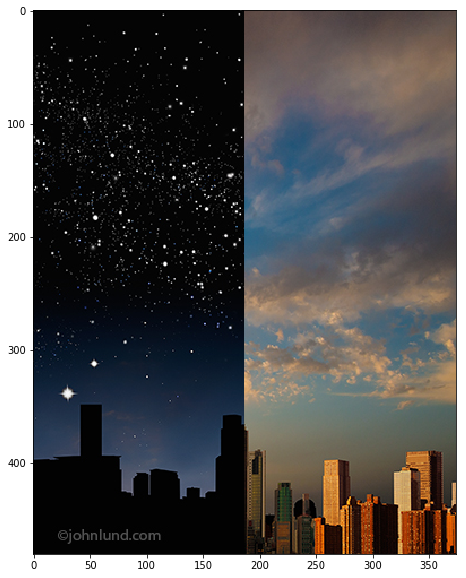

In [27]:
plt.figure(figsize=(12, 10))
plt.imshow(cv2.cvtColor(real, cv2.COLOR_BGR2RGB))

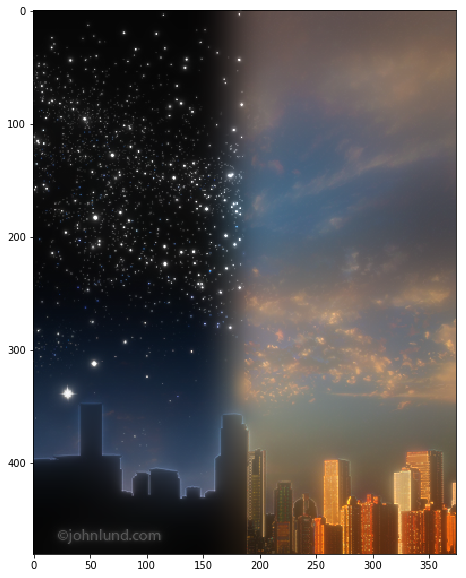

In [26]:
plt.figure(figsize=(12, 10))
plt.imshow(cv2.cvtColor(ls_, cv2.COLOR_BGR2RGB))